In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Amar Kakde\Downloads\social-network\Social_Network_Ads.csv')

In [4]:
socialadv_data = df.copy()

In [6]:
socialadv_data.drop('User ID', axis=1, inplace=True)

In [10]:
sex = pd.get_dummies(socialadv_data['Gender'], drop_first=True, dtype=int)

In [12]:
social_df = pd.concat([socialadv_data, sex], axis=1)

In [66]:
social_df.drop('Gender', axis=1, inplace=True)

KeyError: "['Gender'] not found in axis"

In [67]:
social_df

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


<Axes: >

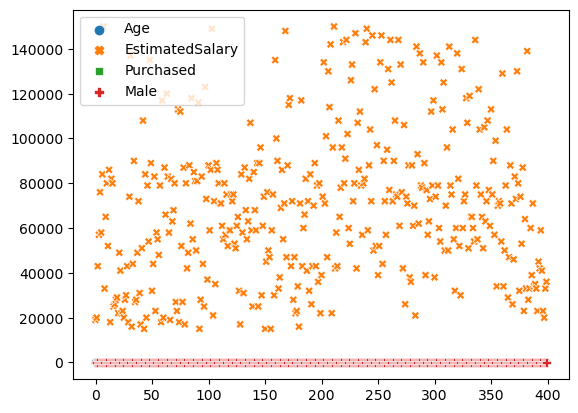

In [71]:
sns.scatterplot(social_df)

<Axes: xlabel='Purchased', ylabel='count'>

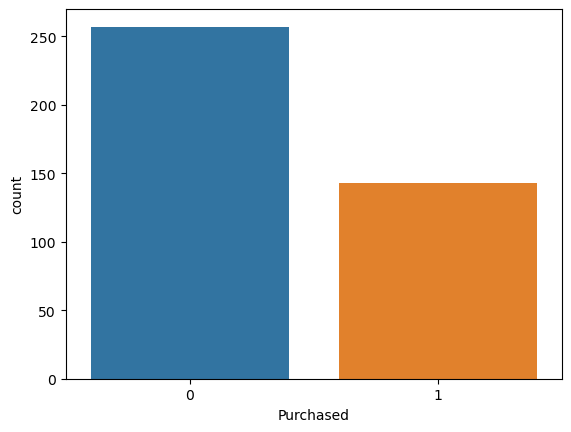

In [75]:
sns.countplot(social_df, x='Purchased')

<Axes: xlabel='Age', ylabel='count'>

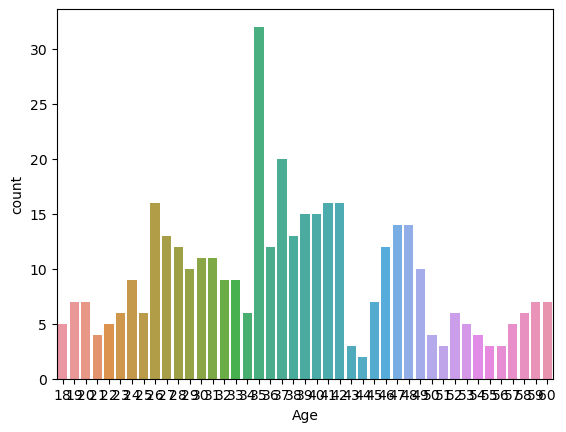

In [76]:
sns.countplot(social_df, x='Age')

<Axes: xlabel='Male', ylabel='count'>

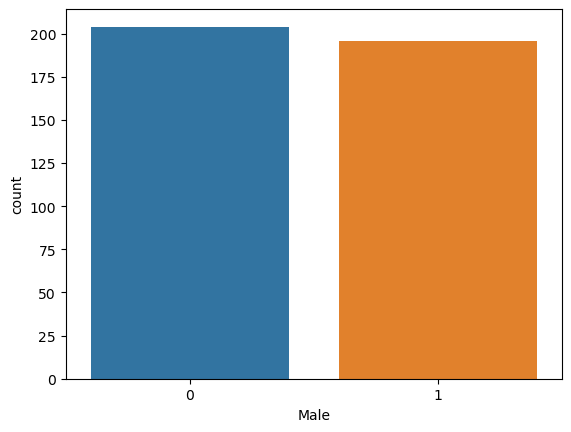

In [77]:
sns.countplot(social_df, x='Male')

<Axes: xlabel='EstimatedSalary', ylabel='count'>

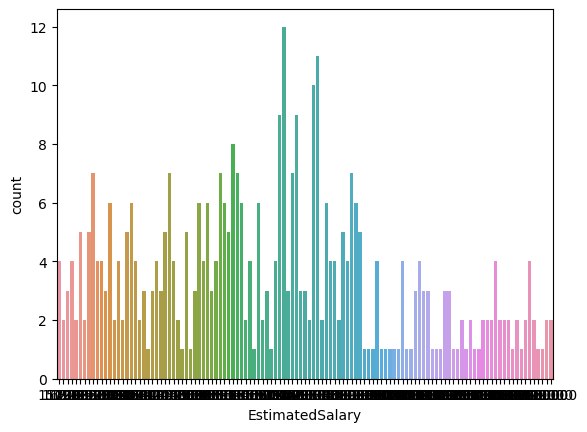

In [79]:
sns.countplot(social_df, x='EstimatedSalary')

In [80]:
import matplotlib.pyplot as plt

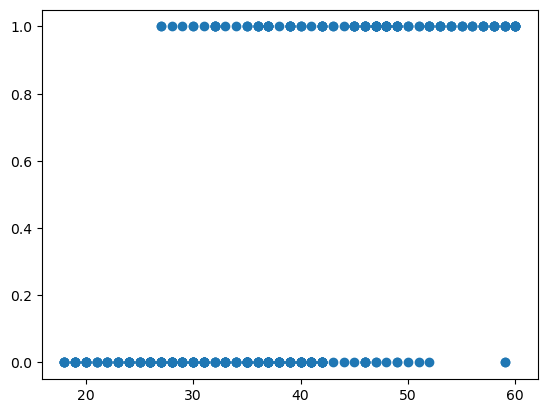

In [81]:
plt.scatter(x=social_df['Age'], y=social_df['Purchased'])

In [82]:
social_df.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


In [83]:
from sklearn.feature_selection import chi2

In [85]:
chi_score, p_value = chi2(X, y)

In [86]:
temp = pd.DataFrame({'Features':X.columns, 'Chi':chi_score, 'p_value':p_value})

In [87]:
temp

,Features,Chi,p_value
0,Age,451.155226,4.043032e-100
1,EstimatedSalary,872013.169231,0.000000e+00
2,Male,0.367946,5.441262e-01


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
le = LogisticRegression(max_iter=100)

In [90]:
le

LogisticRegression()

In [92]:
model = le.fit(X_train, y_train)

In [93]:
y_predict = model.predict(X_test)

In [94]:
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
confusion_matrix(y_test, y_predict)

array([[53, 17],
       [20, 30]], dtype=int64)

In [101]:
accuracy_score(y_test, y_predict)*100

69.16666666666667